### Loading and Preprocessing 

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
# creating the list of path 
# for the train
train_dir=Path('../input/fruit-and-vegetable-image-recognition/train')
train_filepaths=list(train_dir.glob(r'**/*.jpg'))

# for the test
test_dir = Path('../input/fruit-and-vegetable-image-recognition/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

# for the validation data
val_dir = Path('../input/fruit-and-vegetable-image-recognition/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))



In [3]:
# lenght of the data file train,test,validation
print(len(train_filepaths))
print(len(test_filepaths))
print(len(val_filepaths))

2780
334
334


In [4]:

# all are the list and contains the images path
# Print the som random paths
print(train_filepaths[-1])
print(test_filepaths[-1])
print(test_filepaths[-1])

../input/fruit-and-vegetable-image-recognition/train/soy beans/Image_71.jpg
../input/fruit-and-vegetable-image-recognition/test/soy beans/Image_9.jpg
../input/fruit-and-vegetable-image-recognition/test/soy beans/Image_9.jpg


In [5]:
label = str('../input/fruit-and-vegetable-image-recognition/test/soy beans/Image_9.jpg').split("/")
print(label)
print(label[-2])


['..', 'input', 'fruit-and-vegetable-image-recognition', 'test', 'soy beans', 'Image_9.jpg']
soy beans


In [6]:
# creating the dataframe with the file path and the labels
# of the images

def proc_img(filepath):
    labels = []
    for i in range(len(filepath)):
        label = str(filepath[i]).split("/")[-2]
        labels.append(label)

    
    filepath=pd.Series(filepath,name='Filepath').astype(str)
    labels=pd.Series(labels,name='Labels')
    
    df=pd.concat([filepath,labels], axis=1)
    df=df.sample(frac=1).reset_index(drop=True)
    return df

In [7]:
train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)
val_df = proc_img(val_filepaths)

In [8]:
train_df.head(3)

,Filepath,Labels
0,../input/fruit-and-vegetable-image-recognition...,turnip
1,../input/fruit-and-vegetable-image-recognition...,sweetcorn
2,../input/fruit-and-vegetable-image-recognition...,garlic


In [9]:
test_df.head(3)

,Filepath,Labels
0,../input/fruit-and-vegetable-image-recognition...,tomato
1,../input/fruit-and-vegetable-image-recognition...,potato
2,../input/fruit-and-vegetable-image-recognition...,banana


In [10]:
val_df.head(3)

,Filepath,Labels
0,../input/fruit-and-vegetable-image-recognition...,peas
1,../input/fruit-and-vegetable-image-recognition...,mango
2,../input/fruit-and-vegetable-image-recognition...,pineapple


In [11]:
# About the traing data
print(train_df.iloc[0])
print("==========================")
print(train_df.iloc[0]['Filepath'])
print(train_df.iloc[0]['Labels'])
print("=========================\n=========================")
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of all in train_df labels : {len(train_df.Labels)}\n')
print(f'Labels: {train_df.Labels.unique()}\n')
print(f'Number of Unique Labels: {train_df.Labels.nunique()})')
print(f'Number of images of Each Label\n{train_df.Labels.value_counts()})')

Filepath    ../input/fruit-and-vegetable-image-recognition...
Labels                                                 turnip
Name: 0, dtype: object
../input/fruit-and-vegetable-image-recognition/train/turnip/Image_33.jpg
turnip
Number of pictures: 2780

Number of all in train_df labels : 2780

Labels: ['turnip' 'sweetcorn' 'garlic' 'raddish' 'potato' 'banana' 'onion'
 'chilli pepper' 'watermelon' 'cabbage' 'mango' 'capsicum' 'apple'
 'eggplant' 'bell pepper' 'spinach' 'carrot' 'lettuce' 'peas' 'soy beans'
 'tomato' 'beetroot' 'corn' 'jalepeno' 'ginger' 'grapes' 'cucumber' 'pear'
 'orange' 'pomegranate' 'lemon' 'kiwi' 'paprika' 'sweetpotato'
 'cauliflower' 'pineapple']

Number of Unique Labels: 36)
Number of images of Each Label
soy beans        92
peas             90
spinach          87
lettuce          87
grapes           85
turnip           85
beetroot         84
tomato           84
corn             84
pineapple        84
cabbage          84
sweetcorn        83
garlic           83
kiw

In [12]:
# About the testing data
print(test_df.iloc[0])
print("==========================")
print(test_df.iloc[0]['Filepath'])
print(test_df.iloc[0]['Labels'])
print("=========================\n========================")
print(f'Number of pictures: {test_df.shape[0]}\n')
print(f'Number of all in train_df labels : {len(test_df.Labels)}\n')
print(f'Labels: {test_df.Labels.unique()}\n')
print(f'Number of Unique Labels: {test_df.Labels.nunique()})')
print(f'Number of images of Each Label\n{test_df.Labels.value_counts()})')

Filepath    ../input/fruit-and-vegetable-image-recognition...
Labels                                                 tomato
Name: 0, dtype: object
../input/fruit-and-vegetable-image-recognition/test/tomato/Image_6.jpg
tomato
Number of pictures: 334

Number of all in train_df labels : 334

Labels: ['tomato' 'potato' 'banana' 'chilli pepper' 'paprika' 'sweetcorn' 'turnip'
 'spinach' 'capsicum' 'corn' 'onion' 'lemon' 'apple' 'bell pepper'
 'grapes' 'raddish' 'orange' 'cauliflower' 'cabbage' 'pineapple' 'ginger'
 'watermelon' 'soy beans' 'beetroot' 'sweetpotato' 'pomegranate'
 'cucumber' 'garlic' 'mango' 'eggplant' 'peas' 'jalepeno' 'lettuce'
 'carrot' 'kiwi' 'pear']

Number of Unique Labels: 36)
Number of images of Each Label
tomato           10
pineapple        10
kiwi             10
eggplant         10
mango            10
garlic           10
cucumber         10
pomegranate      10
sweetpotato      10
beetroot         10
soy beans        10
watermelon       10
ginger           10
cabbage

In [13]:
# About the validation  data
print(val_df.iloc[0])
print("==========================")
print(val_df.iloc[0]['Filepath'])
print(val_df.iloc[0]['Labels'])
print("=========================\n========================")
print(f'Number of pictures: {val_df.shape[0]}\n')
print(f'Number of all in train_df labels : {len(val_df.Labels)}\n')
print(f'Labels: {val_df.Labels.unique()}\n')
print(f'Number of Unique Labels: {val_df.Labels.nunique()})\n\n')
print(f'Number of images of Each Label\n{val_df.Labels.value_counts()})')

Filepath    ../input/fruit-and-vegetable-image-recognition...
Labels                                                   peas
Name: 0, dtype: object
../input/fruit-and-vegetable-image-recognition/test/peas/Image_3.jpg
peas
Number of pictures: 334

Number of all in train_df labels : 334

Labels: ['peas' 'mango' 'pineapple' 'lettuce' 'watermelon' 'raddish' 'beetroot'
 'pear' 'tomato' 'capsicum' 'carrot' 'cabbage' 'ginger' 'cauliflower'
 'cucumber' 'garlic' 'bell pepper' 'spinach' 'chilli pepper' 'soy beans'
 'corn' 'paprika' 'apple' 'orange' 'turnip' 'onion' 'sweetcorn' 'lemon'
 'eggplant' 'kiwi' 'potato' 'pomegranate' 'jalepeno' 'banana' 'grapes'
 'sweetpotato']

Number of Unique Labels: 36)


Number of images of Each Label
sweetpotato      10
turnip           10
sweetcorn        10
paprika          10
corn             10
soy beans        10
mango            10
spinach          10
eggplant         10
garlic           10
cucumber         10
kiwi             10
ginger           10
cabbage  

In [14]:


# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Labels"]).reset_index()
df_unique   

,index,Filepath,Labels
0,0,../input/fruit-and-vegetable-image-recognition...,turnip
1,1,../input/fruit-and-vegetable-image-recognition...,sweetcorn
2,2,../input/fruit-and-vegetable-image-recognition...,garlic
3,3,../input/fruit-and-vegetable-image-recognition...,raddish
4,4,../input/fruit-and-vegetable-image-recognition...,potato
5,5,../input/fruit-and-vegetable-image-recognition...,banana
6,6,../input/fruit-and-vegetable-image-recognition...,onion
7,7,../input/fruit-and-vegetable-image-recognition...,chilli pepper
8,8,../input/fruit-and-vegetable-image-recognition...,watermelon
9,9,../input/fruit-and-vegetable-image-recognition...,cabbage


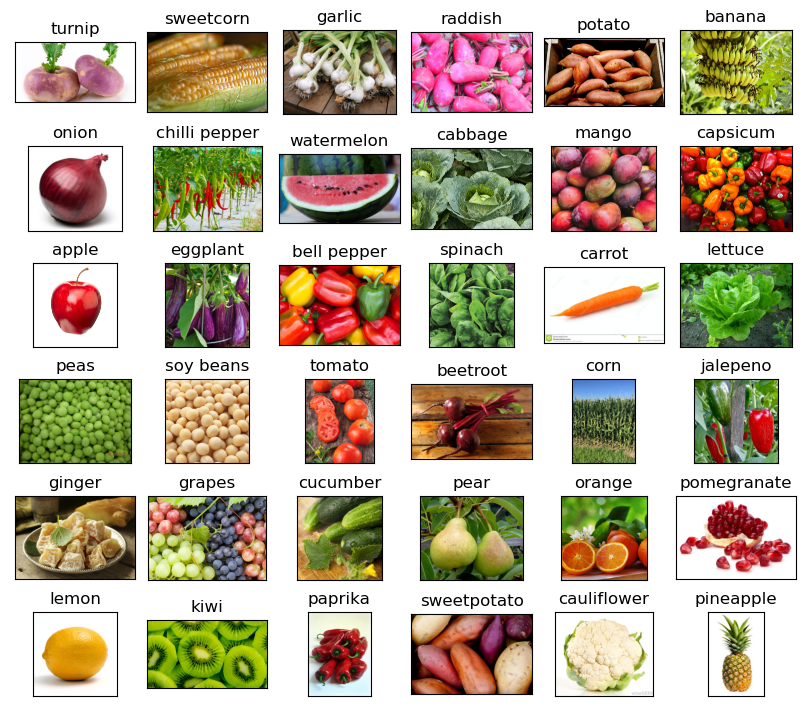

In [15]:
# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Labels[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

### Load the images with a genrator an Data Augmenation

In [16]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)


In [17]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Labels',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2780 validated image filenames belonging to 36 classes.


In [18]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Labels',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 334 validated image filenames belonging to 36 classes.


In [19]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Labels',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 334 validated image filenames belonging to 36 classes.


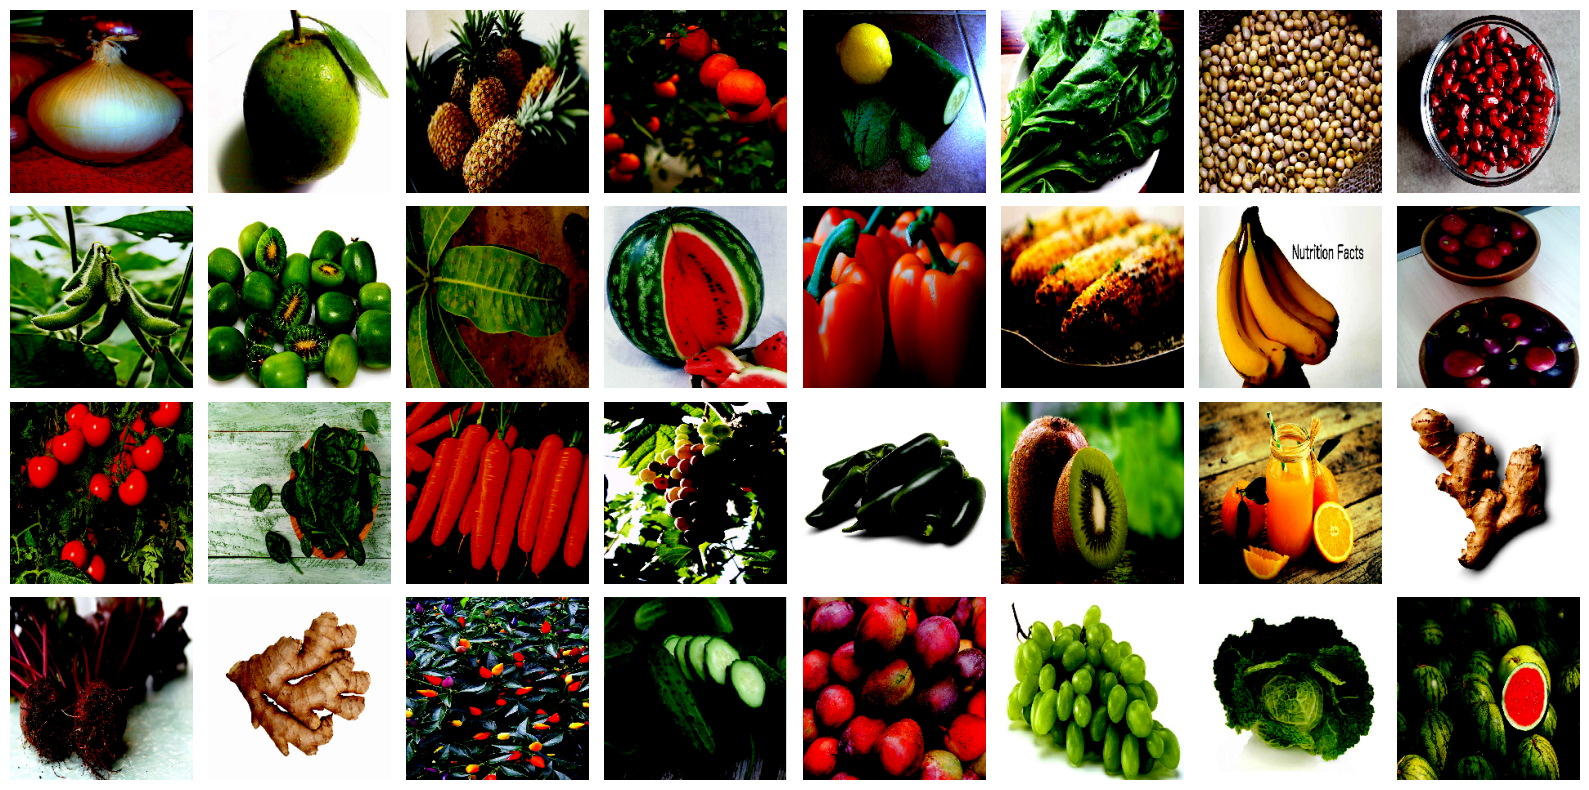

In [20]:
import matplotlib.pyplot as plt

# get the next batch of images and labels
images, labels = next(train_images)

# display the images
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(16, 8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i])
    ax.axis('off')
#     ax.set_title(labels[i])
plt.tight_layout()
plt.show()


### Train the model Using the =====>>>>  VGG Pretrained Model

In [21]:
pretrained_model = tf.keras.applications.VGG16(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [22]:
inputs = pretrained_model.input
print(inputs)

KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [23]:
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [28]:
history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
87/87 [==============================] - 126s 1s/step - loss: 1.0185 - accuracy: 0.7083 - val_loss: 0.6384 - val_accuracy: 0.8323
Epoch 2/10
87/87 [==============================] - 125s 1s/step - loss: 0.9038 - accuracy: 0.7385 - val_loss: 0.6150 - val_accuracy: 0.8443
Epoch 3/10
87/87 [==============================] - 124s 1s/step - loss: 0.8238 - accuracy: 0.7583 - val_loss: 0.5591 - val_accuracy: 0.8772
Epoch 4/10
87/87 [==============================] - 125s 1s/step - loss: 0.7526 - accuracy: 0.7856 - val_loss: 0.4717 - val_accuracy: 0.8623
Epoch 5/10
87/87 [==============================] - 124s 1s/step - loss: 0.6893 - accuracy: 0.7978 - val_loss: 0.4194 - val_accuracy: 0.8683
Epoch 6/10
87/87 [==============================] - 123s 1s/step - loss: 0.6421 - accuracy: 0.8004 - val_loss: 0.4161 - val_accuracy: 0.9012
Epoch 7/10
87/87 [==============================] - 122s 1s/step - loss: 0.5854 - accuracy: 0.8299 - val_loss: 0.3991 - val_accuracy: 0.8952
Epoch 8/10
87

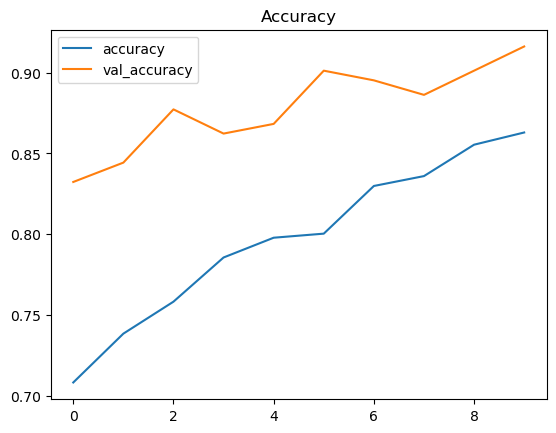

In [29]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

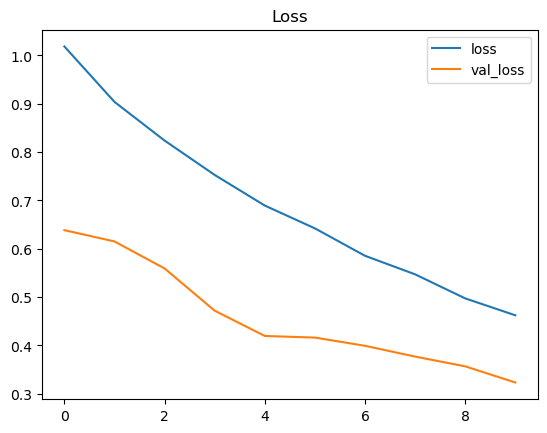

In [30]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

### Predict the label of the test_images

In [31]:
# Predict the label of the test_images
pred = model.predict(test_images)
print(pred)
print("\n==============================================\n")
pred1 = np.argmax(pred,axis=1)
print(pred1)

11/11 [==============================] - 18s 2s/step
[[5.1006731e-03 1.0637818e-04 3.2928099e-03 ... 5.7618099e-01
  2.1325245e-03 1.1242057e-04]
 [1.0390263e-02 2.1876079e-01 1.3309915e-04 ... 2.7353471e-04
  2.1362596e-03 1.0938367e-03]
 [1.2131847e-05 9.9081171e-01 2.8061081e-07 ... 9.6009035e-07
  4.9723729e-07 7.1282461e-06]
 ...
 [4.8538583e-05 2.2666007e-05 7.9678232e-04 ... 4.1120839e-07
  1.7592409e-05 1.3242157e-04]
 [5.8776868e-04 1.6106220e-05 9.4020697e-06 ... 8.8779759e-03
  2.5654140e-06 1.9367984e-05]
 [4.6074806e-06 5.1772412e-02 1.5607025e-04 ... 3.9866016e-08
  1.2558118e-04 2.3136362e-04]]


[33  1  1  8 22  9 34 30  8 30 34  3  9 20 17  8 15  0  5 14  9 28 21  7
  4 25 25  1 13  4  4  4  1 31 35 20 29  2 35  9 30 34  0 13 31 17 29  7
 32 28  7 26 30 13 25  7 28 10 33 12  3 21 19 25 11 31 10 19 10 30 34 33
  3  0  9 24 15 11 17  5 32  5  8  9 13 11 18 32  6 31  2 10  9 18 15 35
 34 12 34 22 18 15 19 11 12 34 18 16 23 34  9 29  6 30 12  5 26 16 30 20
 10  3 27 23 10 

In [32]:
# Map the label
labels = (train_images.class_indices)
print(labels)
print("\n==============================================\n")
print(labels.items())

{'apple': 0, 'banana': 1, 'beetroot': 2, 'bell pepper': 3, 'cabbage': 4, 'capsicum': 5, 'carrot': 6, 'cauliflower': 7, 'chilli pepper': 8, 'corn': 9, 'cucumber': 10, 'eggplant': 11, 'garlic': 12, 'ginger': 13, 'grapes': 14, 'jalepeno': 15, 'kiwi': 16, 'lemon': 17, 'lettuce': 18, 'mango': 19, 'onion': 20, 'orange': 21, 'paprika': 22, 'pear': 23, 'peas': 24, 'pineapple': 25, 'pomegranate': 26, 'potato': 27, 'raddish': 28, 'soy beans': 29, 'spinach': 30, 'sweetcorn': 31, 'sweetpotato': 32, 'tomato': 33, 'turnip': 34, 'watermelon': 35}


dict_items([('apple', 0), ('banana', 1), ('beetroot', 2), ('bell pepper', 3), ('cabbage', 4), ('capsicum', 5), ('carrot', 6), ('cauliflower', 7), ('chilli pepper', 8), ('corn', 9), ('cucumber', 10), ('eggplant', 11), ('garlic', 12), ('ginger', 13), ('grapes', 14), ('jalepeno', 15), ('kiwi', 16), ('lemon', 17), ('lettuce', 18), ('mango', 19), ('onion', 20), ('orange', 21), ('paprika', 22), ('pear', 23), ('peas', 24), ('pineapple', 25), ('pomegranate', 26), 

In [33]:
labels = dict((v,k) for k,v in labels.items())

In [34]:
labels

{0: 'apple',
 1: 'banana',
 2: 'beetroot',
 3: 'bell pepper',
 4: 'cabbage',
 5: 'capsicum',
 6: 'carrot',
 7: 'cauliflower',
 8: 'chilli pepper',
 9: 'corn',
 10: 'cucumber',
 11: 'eggplant',
 12: 'garlic',
 13: 'ginger',
 14: 'grapes',
 15: 'jalepeno',
 16: 'kiwi',
 17: 'lemon',
 18: 'lettuce',
 19: 'mango',
 20: 'onion',
 21: 'orange',
 22: 'paprika',
 23: 'pear',
 24: 'peas',
 25: 'pineapple',
 26: 'pomegranate',
 27: 'potato',
 28: 'raddish',
 29: 'soy beans',
 30: 'spinach',
 31: 'sweetcorn',
 32: 'sweetpotato',
 33: 'tomato',
 34: 'turnip',
 35: 'watermelon'}

In [35]:
pred = [labels[k] for k in pred1]
print(pred)

['tomato', 'banana', 'banana', 'chilli pepper', 'paprika', 'corn', 'turnip', 'spinach', 'chilli pepper', 'spinach', 'turnip', 'bell pepper', 'corn', 'onion', 'lemon', 'chilli pepper', 'jalepeno', 'apple', 'capsicum', 'grapes', 'corn', 'raddish', 'orange', 'cauliflower', 'cabbage', 'pineapple', 'pineapple', 'banana', 'ginger', 'cabbage', 'cabbage', 'cabbage', 'banana', 'sweetcorn', 'watermelon', 'onion', 'soy beans', 'beetroot', 'watermelon', 'corn', 'spinach', 'turnip', 'apple', 'ginger', 'sweetcorn', 'lemon', 'soy beans', 'cauliflower', 'sweetpotato', 'raddish', 'cauliflower', 'pomegranate', 'spinach', 'ginger', 'pineapple', 'cauliflower', 'raddish', 'cucumber', 'tomato', 'garlic', 'bell pepper', 'orange', 'mango', 'pineapple', 'eggplant', 'sweetcorn', 'cucumber', 'mango', 'cucumber', 'spinach', 'turnip', 'tomato', 'bell pepper', 'apple', 'corn', 'peas', 'jalepeno', 'eggplant', 'lemon', 'capsicum', 'sweetpotato', 'capsicum', 'chilli pepper', 'corn', 'ginger', 'eggplant', 'lettuce', 's

In [36]:
y_test = [labels[k] for k in test_images.classes]
print(y_test)

['tomato', 'potato', 'banana', 'chilli pepper', 'paprika', 'sweetcorn', 'turnip', 'spinach', 'paprika', 'spinach', 'turnip', 'capsicum', 'corn', 'onion', 'lemon', 'paprika', 'chilli pepper', 'apple', 'bell pepper', 'grapes', 'corn', 'raddish', 'orange', 'cauliflower', 'cabbage', 'pineapple', 'pineapple', 'banana', 'ginger', 'cabbage', 'cabbage', 'cabbage', 'banana', 'sweetcorn', 'watermelon', 'onion', 'soy beans', 'beetroot', 'watermelon', 'corn', 'spinach', 'turnip', 'apple', 'ginger', 'sweetcorn', 'lemon', 'soy beans', 'cauliflower', 'sweetpotato', 'raddish', 'cauliflower', 'pomegranate', 'spinach', 'ginger', 'pineapple', 'cauliflower', 'raddish', 'cucumber', 'tomato', 'garlic', 'bell pepper', 'orange', 'mango', 'pineapple', 'eggplant', 'sweetcorn', 'cucumber', 'mango', 'cucumber', 'spinach', 'turnip', 'tomato', 'bell pepper', 'apple', 'corn', 'peas', 'jalepeno', 'eggplant', 'lemon', 'bell pepper', 'sweetpotato', 'bell pepper', 'chilli pepper', 'corn', 'ginger', 'eggplant', 'lettuce'

In [37]:
print(len(pred))
print(len(y_test))

334
334


In [38]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 91.62%


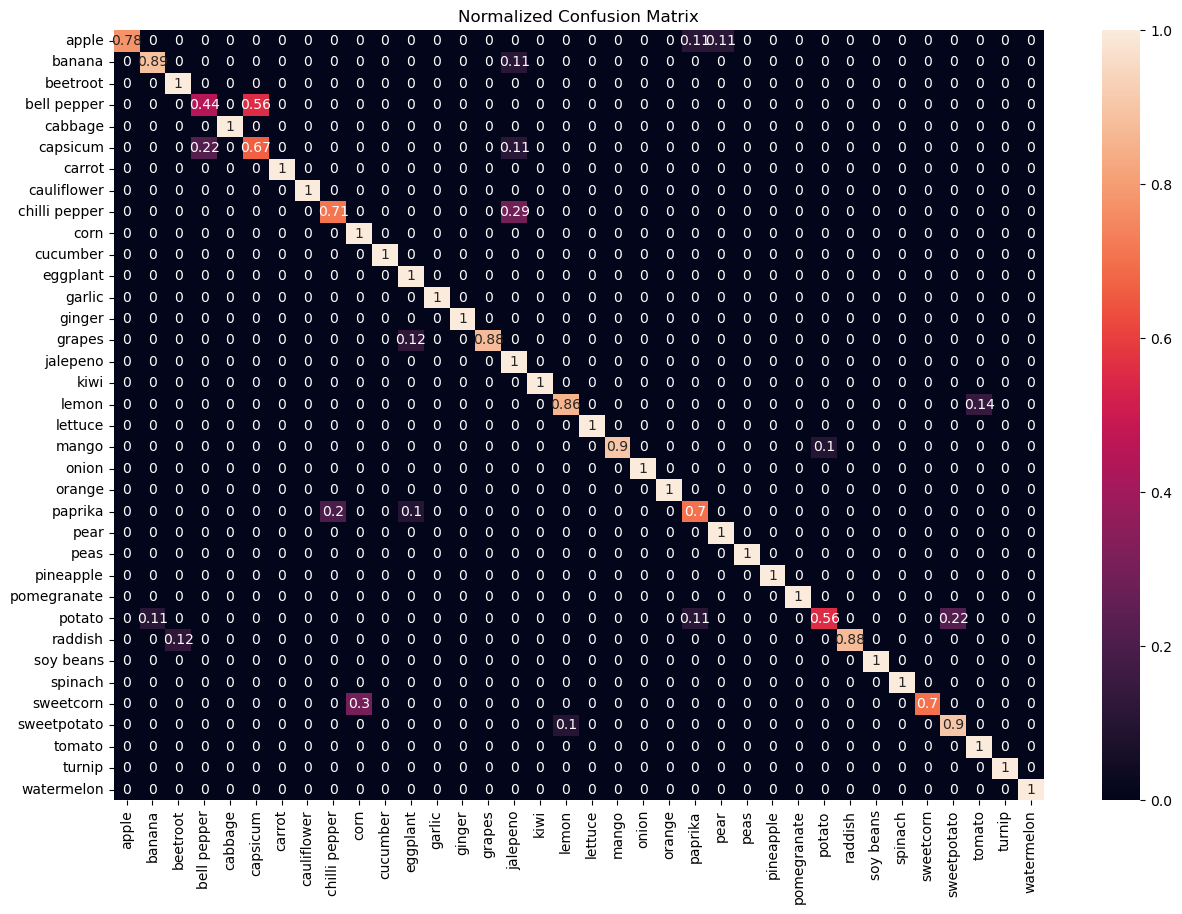

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(y_test)), 
            yticklabels = sorted(set(y_test)),
            )
plt.title('Normalized Confusion Matrix')
plt.show()

In [40]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, pred)

# Print the report
print(report)

               precision    recall  f1-score   support

        apple       1.00      0.78      0.88         9
       banana       0.89      0.89      0.89         9
     beetroot       0.91      1.00      0.95        10
  bell pepper       0.67      0.44      0.53         9
      cabbage       1.00      1.00      1.00        10
     capsicum       0.55      0.67      0.60         9
       carrot       1.00      1.00      1.00         7
  cauliflower       1.00      1.00      1.00         9
chilli pepper       0.71      0.71      0.71         7
         corn       0.77      1.00      0.87        10
     cucumber       1.00      1.00      1.00        10
     eggplant       0.83      1.00      0.91        10
       garlic       1.00      1.00      1.00        10
       ginger       1.00      1.00      1.00        10
       grapes       1.00      0.88      0.93         8
     jalepeno       0.69      1.00      0.82         9
         kiwi       1.00      1.00      1.00        10
        l

In [ ]:
model.save('VGGFruitModel.h5')